![bloch sphere](./images/bloch_sphere.png)

# FTL_QUANTUM
## Quantum Logic Gates
### X, Z, H (Hadamard), T
```
   ┌───┐      ┌───┐      ┌───┐      ┌───┐ 
q: ┤ X ├   q: ┤ Z ├   q: ┤ H ├   q: ┤ T ├ 
   └───┘      └───┘      └───┘      └───┘ 
```

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{X Gate} \rarr \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \beta \\ \alpha \end{bmatrix}$

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{Z Gate} \rarr \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \alpha \\ -\beta \end{bmatrix}$

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{H Gate} \rarr \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} \alpha + \beta \\ \alpha - \beta \end{bmatrix}$

$q = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle \rarr \text{H Gate} \rarr \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} +1 \\ -1 \end{bmatrix} = |+\rangle$

$q = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle \rarr \text{H Gate} \rarr \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} +1 \\ -1 \end{bmatrix} = |-\rangle$

$q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \rarr \text{H Gate} \rarr \begin{bmatrix} 1 & 0 \\ 0 & e^{{i\pi}/4} \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} \alpha \\ e^{{i\pi}/4} \beta \end{bmatrix}$


### CNOT (XOR)
```
q_0: ──■──      ──■── 
     ┌─┴─┐  ==    |   
q_1: ┤ X ├        |   
     └───┘      ──⊕── 
```

$
CNOT(q_0, q_1) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix}
= \begin{bmatrix} a \\ b \\ d \\ c \end{bmatrix}
= a|00\rangle+b|01\rangle+d|10\rangle+c|11\rangle
$

### SWAP

```
     ──X── 
Swap   |   
       |   
     ──X── 
```
$
Swap(q_0, q_1) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix}
= \begin{bmatrix} a \\ c \\ b \\ d \end{bmatrix}
= a|00\rangle+c|01\rangle+b|10\rangle+d|11\rangle
$

## Exercise 3: Superposition

Write a program (using Python and Qiskit) that will produce a quantum circuit with a single qubit to obtain this $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ state using the principle of quantum superposition.

The expression $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ is actually $|+\rangle$ (a superposition state), so only a Hadamard gate on single qubit quantum circuit would do.

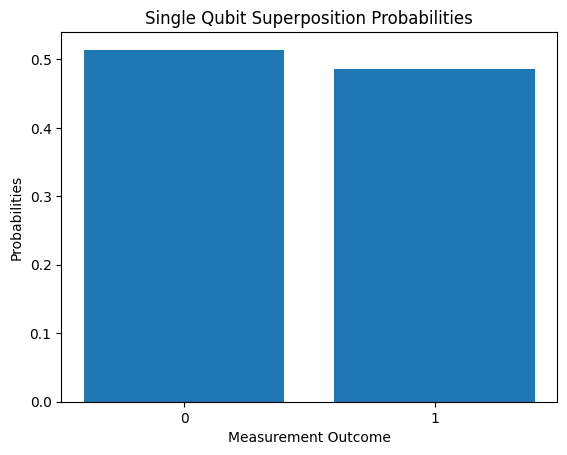

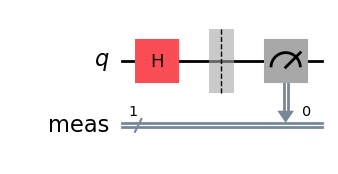

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from sources.QuantumPlot import qplot

# Create Circuit
qc = QuantumCircuit(1)  # Single qubit quantum circuit
qc.h(0)  # Hadamard gate on qubit 0
qc.measure_all()  # Measeure all qubits.

# Simulate Circuit
backend = Aer.get_backend('qasm_simulator')  # Get the Aer simulator
qc = transpile(qc, backend)  # Optimize and transpile
result = backend.run(qc, shots = 500).result()  # 500 shots
counts = result.get_counts(qc)

# Plot Results
qplot(counts)
qc.draw(output='mpl')

## Exercise 3: Entanglement
Write a program that will produce a quantum circuit with two qubits in order to obtain this $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ state using the principle of superposition and quantum entanglement.

The program must display the circuit, then run it on a quantum simulator with 500 shots and then display the results in a plot_histogram.

Be sure you understand the principle of quantum entanglement and the $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$ notation before continuing.

#### Solution

Let $\psi_0 = a[00\rangle + b[01\rangle + c[10\rangle + d[11\rangle $



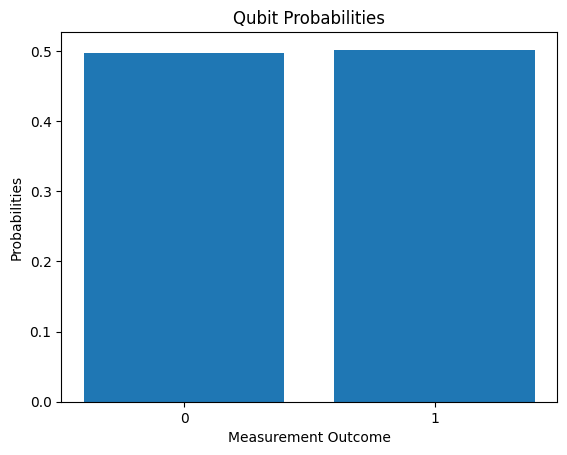

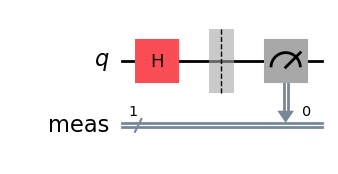

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from sources.QuantumPlot import qplot

# Create Circuit
qc = QuantumCircuit(1)  # Single qubit quantum circuit
qc.h(0)  # Hadamard gate on qubit 0
qc.measure_all()  # Measeure all qubits.

# Simulate Circuit
backend = Aer.get_backend('qasm_simulator')  # Get the Aer simulator
qc = transpile(qc, backend)  # Optimize and transpile
result = backend.run(qc, shots = 500).result()  # 500 shots
counts = result.get_counts(qc)

# Plot Results
qplot(counts)
qc.draw(output='mpl')